In [ ]:
import re
import demoji

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
import pandas as pd

def guardar_dataframe_a_csv(dataframe, nombre_archivo_salida):
    # Guardar el DataFrame modificado como un archivo CSV
    dataframe.to_csv(nombre_archivo_salida, index=False)

In [5]:
import pandas as pd

# Cargar el DataFrame con los datos
df = pd.read_csv('spanish_tweets_suggesting_signs_of_depression_v1.csv')

# Verificar los valores nulos en el DataFrame
print(df.isnull().sum())



TWEET_ID_ANON    0
USER_ID_ANON     0
TWEET_TEXT       0
CREATED_AT       0
dtype: int64


In [6]:
# Eliminar duplicados en el DataFrame
df = df.drop_duplicates()
df

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


In [7]:
df['TWEET_TEXT'] [2]

'La tristeza es lo más fácil de ocultar de todos los sentimientos que trae consigo la depresión #LaDepresiónEsMulticolor'

In [8]:
def conservar_puntuacion(oracion):
    puntuacion_relevante = ['!', '?', '"', "'"]  # Agrega aquí otros signos relevantes si es necesario
    oracion_conservada = re.findall(r"[\w']+|[{}]".format(''.join(puntuacion_relevante)), oracion)
    return ' '.join(oracion_conservada)

In [ ]:
import re
import emoji
import demoji
import nltk

demoji.download_codes()
def clean_tweet(tweet, word_to_remove):
    # Eliminar URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

    # Eliminar menciones
    tweet = re.sub(r'@\w+ ', "", tweet, flags=re.MULTILINE)

    # Eliminar hashtags y separar palabras
    tweet = re.sub(r'#\w+', lambda x: " ".join(x.group(0)[1:].split()), tweet)

    # Reemplazar caracteres especiales como '\n' por espacios
    tweet = re.sub(r'\n', ' ', tweet)
    # Eliminar caracteres especiales y números
    #tweet = re.sub(r'[^\w\s]', "", tweet)
    tweet = re.sub(r'\d+', '', tweet)
     # Eliminar la palabra específica
    tweet = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', tweet, flags=re.IGNORECASE)
    
    #separando palabras
    separated_word = re.sub(r'([A-Z][a-z]+)', r' \1', re.sub(r'([a-z])([A-Z])', r'\1 \2', tweet))
    separated_word = re.sub(r'\d+', lambda x: ' ' + x.group(0) + ' ', separated_word)
    separated_word = re.sub(r'\s+', ' ', separated_word)
    separated_word = separated_word.strip()
   
    #NORMALIZATION TOKENIZATION
     
    separated_word = conservar_puntuacion(separated_word)
    
    
    separated_word = ' '.join(separated_word)
    
    #SOPR WORDS
    #separated_word=eliminar_stopwords(separated_word)
    #NORMALIZACION EXTRA
    #separated_word=normalizacion_palabras(separated_word)
    #separated_word = ' '.join(separated_word)

    return separated_word
  


# Configurar el idioma para la biblioteca demoji
demoji.download_codes()

# Ejemplo de uso
tweet = "Mis días cada vez son más mierda 😒 Estoy cansada de vivir!!!. EXTERNAL_LINK\n\n#LaDepresiónEsMulticolor"
word_to_remove = "EXTERNAL_LINK"
cleaned_tweet = clean_tweet(tweet, word_to_remove)
print(cleaned_tweet)


In [ ]:
word_to_remove = "EXTERNAL_LINK"

# Aplicar la función clean_tweet a cada fila del DataFrame
df['CLEANED_TEXT'] = df['TWEET_TEXT'].apply(lambda x: clean_tweet(x, word_to_remove))
df

In [2]:
from googletrans import Translator
translator = Translator()
print(translator.translate('안녕하세요.'))
# <Translated src=ko dest=en text=Good evening. pronunciation=Good evening.>

Translated(src=ko, dest=en, text=hello., pronunciation=None, extra_data="{'confiden...")


In [3]:

from googletrans import Translator
import time
def translate_to_english(word):
    translator = Translator()

    # Retry translation in case of failure
    for _ in range(3):
        try:
            translation = translator.translate(word, src='es', dest='en')
            return translation.text
        except Exception as e:
            print(f"Translation failed. Retrying in 1 second. Error: {e}")
            time.sleep(5)

    return None  # Return None if translation fails after retries


Hello World


In [5]:
import pandas as pd

def leer_csv_a_dataframe(nombre_archivo_csv):
    # Leer el archivo CSV y convertirlo a un DataFrame
    dataframe = pd.read_csv(nombre_archivo_csv)

    return dataframe

# Ejemplo de uso:
# Supongamos que 'mi_archivo.csv' es tu archivo CSV
archivo_csv = 'spanish_tweets_suggesting_signs_of_depression_v2.csv'

# Llama a la función para leer el CSV y convertirlo a un DataFrame
df = leer_csv_a_dataframe(archivo_csv)
df = df.drop('Unnamed: 0', axis=1)
df

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT,CLEANED
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,Deberian eliminar a las malas personas y a los...
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,Ya deja de intentar contarle tus problemas a a...
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,La tristeza es lo mas facil de ocultar de todo...
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,De las peores cosas de la depresion es que no ...
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,La soledad es lo unico constante en mi vida. C...
...,...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,De nuevo vacio
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,Cansado si muy cansado de todo de la gente y d...
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,LA VIDA ME MATAA


In [6]:
for index, row in df.iterrows():
    texto = row['CLEANED']
    texto_ingles = translate_to_english(texto)
    df.at[index, 'EN_TEXT'] = texto_ingles
    time.sleep(2)
df

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT,CLEANED,EN_TEXT
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...
...,...,...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,De nuevo vacio,Again empty
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay"
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,LA VIDA ME MATAA,Life kills me


In [7]:
df.to_csv('spanish_tweets_suggesting_signs_of_depression_v3.csv')

In [16]:
df_

,TWEET_TEXT,CLEANED,EN_TEXT
0,Deberían eliminar a las malas personas y a los...,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...
1,Ya deja de intentar contarle tus problemas a a...,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...
2,La tristeza es lo más fácil de ocultar de todo...,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...
3,De las peores cosas de la depresión es que no ...,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...
4,La soledad es lo único constante en mi vida. C...,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...
...,...,...,...
995,De nuevo vacío,De nuevo vacio,Again empty
996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay"
997,Cansado si muy cansado de todo de la gente y d...,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life
998,LA VIDA ME MATAA,LA VIDA ME MATAA,Life kills me


In [21]:
from textblob import TextBlob
wiki = TextBlob("¡Hi, this is an amazing example of TextBlob in spanish!")
print(wiki.sentiment)

print(wiki.sentiment_assessments)

0.45
Sentiment(polarity=0.30000000000000004, subjectivity=0.45, assessments=[(['amazing'], 0.6000000000000001, 0.9, None), (['spanish', '!'], 0.0, 0.0, None)])


In [25]:
def textBlob(sentence):
    #print(sentence)
           
    # Crea un objeto TextBlob con la oración
    blob = TextBlob(sentence)
    
    # Obtiene la polaridad de la oración (-1 para negativo, 1 para positivo)
    polaridad = blob.sentiment.polarity
    subjectivity= blob.sentiment.subjectivity
    
    return polaridad,subjectivity

polaridad, subjetividad =textBlob("¡Hi, this is an example of TextBlob in spanish!")
print(polaridad,subjetividad)

0.0 0.0


In [26]:
# Definir una función para aplicar a cada fila
def process_row(row):
    cleaned_text = row['EN_TEXT']
    polaridad, subjetividad = textBlob(cleaned_text)
    
    # Asignar valores directamente a las columnas
    row['POLARITY_TXTB'] = polaridad
    row['SUBJETIVITY_TXTB'] = subjetividad
    return row

df_ = df_.apply(process_row, axis=1)
df_



,TWEET_TEXT,CLEANED,EN_TEXT,POLARITY_TXTB,SUBJETIVITY_TXTB
0,Deberían eliminar a las malas personas y a los...,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,-0.333333,0.688889
1,Ya deja de intentar contarle tus problemas a a...,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,0.000000,0.000000
2,La tristeza es lo más fácil de ocultar de todo...,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,0.000000,0.000000
3,De las peores cosas de la depresión es que no ...,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,-0.287879,0.833333
4,La soledad es lo único constante en mi vida. C...,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,0.140000,0.566667
...,...,...,...,...,...
995,De nuevo vacío,De nuevo vacio,Again empty,-0.100000,0.500000
996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",0.416667,0.583333
997,Cansado si muy cansado de todo de la gente y d...,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,-0.460000,0.805000
998,LA VIDA ME MATAA,LA VIDA ME MATAA,Life kills me,0.000000,0.000000


In [ ]:
# Definir una función para aplicar a cada fila
def process_row(row):
    cleaned_text = row['EN_TEXT']
    polaridad, subjetividad = textBlob(cleaned_text)
    
    # Asignar valores directamente a las columnas
    row['POLARITY_TXTB'] = polaridad
    row['SUBJETIVITY_TXTB'] = subjetividad
    return row

df_ = df_.apply(process_row, axis=1)
df_



In [29]:
from googletrans import Translator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#vader
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
        
    return sentiment_dict['compound']
sentence1 = ('''ANN is like our brain; millions and billions of cells — called neurons, which processes information in the form of electric signals. Similarly, in ANN, the network structure has an input layer, a hidden layer, and the output layer. It is also called Multi-Layer Perceptron as it has multiple layers. The hidden layer is known as a “distillation layer” that distils some critical patterns from the data/information and passes it onto the next layer. It then makes the network quicker and more productive by distinguishing the data from the data sources, leaving out the excess data.''')
print(sentence1)
print(sentiment_scores(sentence1))

ANN is like our brain; millions and billions of cells — called neurons, which processes information in the form of electric signals. Similarly, in ANN, the network structure has an input layer, a hidden layer, and the output layer. It is also called Multi-Layer Perceptron as it has multiple layers. The hidden layer is known as a “distillation layer” that distils some critical patterns from the data/information and passes it onto the next layer. It then makes the network quicker and more productive by distinguishing the data from the data sources, leaving out the excess data.
0.0516


In [30]:
# Definir una función para aplicar a cada fila
def process_row(row):
    cleaned_text = row['EN_TEXT']
    polaridad = sentiment_scores(cleaned_text)
    row['POLARITY_VADER'] = polaridad
    return row

df_ = df_.apply(process_row, axis=1)
df_



,TWEET_TEXT,CLEANED,EN_TEXT,POLARITY_TXTB,SUBJETIVITY_TXTB,POLARITY_VADER
0,Deberían eliminar a las malas personas y a los...,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,-0.333333,0.688889,-0.6486
1,Ya deja de intentar contarle tus problemas a a...,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,0.000000,0.000000,0.4530
2,La tristeza es lo más fácil de ocultar de todo...,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,0.000000,0.000000,-0.6705
3,De las peores cosas de la depresión es que no ...,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,-0.287879,0.833333,-0.9290
4,La soledad es lo único constante en mi vida. C...,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,0.140000,0.566667,-0.8001
...,...,...,...,...,...,...
995,De nuevo vacío,De nuevo vacio,Again empty,-0.100000,0.500000,-0.2023
996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",0.416667,0.583333,0.0000
997,Cansado si muy cansado de todo de la gente y d...,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,-0.460000,0.805000,-0.7264
998,LA VIDA ME MATAA,LA VIDA ME MATAA,Life kills me,0.000000,0.000000,-0.5423


In [48]:
df_.to_csv('spanish_tweets_suggesting_signs_of_depression_v3.csv')

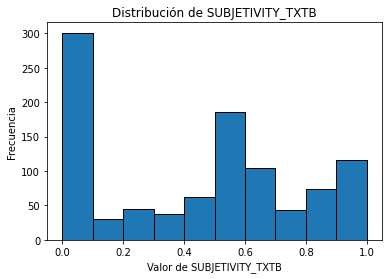

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_['SUBJETIVITY_TXTB'], bins=10, edgecolor='black')  # Ajusta el número de bins según tu preferencia
plt.title('Distribución de SUBJETIVITY_TXTB')
plt.xlabel('Valor de SUBJETIVITY_TXTB')
plt.ylabel('Frecuencia')
plt.show()


In [38]:
df_sorted = df_['SUBJETIVITY_TXTB'].value_counts().sort_index()
print(df_sorted)

SUBJETIVITY_TXTB
0.000000    296
0.050000      2
0.062500      1
0.066667      2
0.100000     15
           ... 
0.925000      1
0.937500      2
0.950000      1
0.953333      1
1.000000     65
Name: count, Length: 162, dtype: int64


In [40]:
total_valores_mayores_a_0_5 = (df_['SUBJETIVITY_TXTB'] > 0.5).sum()

# Imprimir el resultado
print("Total de valores mayores a 0.5:", total_valores_mayores_a_0_5)


Total de valores mayores a 0.5: 439


In [50]:
total_valores_mayores_a_0_5 = (df_['SUBJETIVITY_TXTB'] <= 0.5).sum()

# Imprimir el resultado
print("Total de valores mayores a 0.5:", total_valores_mayores_a_0_5)

Total de valores mayores a 0.5: 561


In [69]:
total_valores_mayores_a_0_5 = ((df_['POLARITY_TXTB'] == 0.0) & (df_['SUBJETIVITY_TXTB'] <= 0.5) &(df_['POLARITY_VADER'] == 0.0)).sum()

# Imprimir el resultado
print("Total de valores mayores a 0.5:", total_valores_mayores_a_0_5)


Total de valores mayores a 0.5: 81


In [70]:
sub_df = df_[((df_['POLARITY_TXTB'] == 0.0) & (df_['SUBJETIVITY_TXTB'] <= 0.5)&(df_['POLARITY_VADER'] == 0.0))]

# Imprimir el resultado
sub_df


,TWEET_TEXT,CLEANED,EN_TEXT,POLARITY_TXTB,SUBJETIVITY_TXTB,POLARITY_VADER
22,"No sé si esta noche podré pormir,ñe.","No se si esta noche podre pormir,ne.","I don't know if tonight I can pormir, ne.",0.0,0.00,0.0
24,Siento una necesidad muy grande de autolesiona...,Siento una necesidad muy grande de autolesiona...,I feel a very big need to self -harm.,0.0,0.13,0.0
33,Me despierto por una pesadilla que me deja pen...,Me despierto por una pesadilla que me deja pen...,I wake up for a nightmare that leaves me think...,0.0,0.00,0.0
70,Siempre termino estando sola. Siempre.,Siempre termino estando sola. Siempre.,I always end up being alone.Always.,0.0,0.00,0.0
71,"Mirenmen ,no valgo nada","Mirenmen ,no valgo nada","Look, I don't use anything",0.0,0.00,0.0
...,...,...,...,...,...,...
957,Ya no puedo mas EXTERNAL_LINK,Ya no puedo mas,I can not anymore,0.0,0.00,0.0
979,Que insoportable es mi existencia,Que insoportable es mi existencia,What unbearable is my existence,0.0,0.00,0.0
981,Que asco existir,Que asco existir,How to exist,0.0,0.00,0.0
987,Un día de estos voy a explotar y sacar todo lo...,Un dia de estos voy a explotar y sacar todo lo...,One day I will explode and get everything I ha...,0.0,0.00,0.0


Estamos ignorando la subjetividad debido a la naturaleza del dataset

In [71]:
df_

,TWEET_TEXT,CLEANED,EN_TEXT,POLARITY_TXTB,SUBJETIVITY_TXTB,POLARITY_VADER
0,Deberían eliminar a las malas personas y a los...,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,-0.333333,0.688889,-0.6486
1,Ya deja de intentar contarle tus problemas a a...,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,0.000000,0.000000,0.4530
2,La tristeza es lo más fácil de ocultar de todo...,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,0.000000,0.000000,-0.6705
3,De las peores cosas de la depresión es que no ...,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,-0.287879,0.833333,-0.9290
4,La soledad es lo único constante en mi vida. C...,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,0.140000,0.566667,-0.8001
...,...,...,...,...,...,...
995,De nuevo vacío,De nuevo vacio,Again empty,-0.100000,0.500000,-0.2023
996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",0.416667,0.583333,0.0000
997,Cansado si muy cansado de todo de la gente y d...,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,-0.460000,0.805000,-0.7264
998,LA VIDA ME MATAA,LA VIDA ME MATAA,Life kills me,0.000000,0.000000,-0.5423


In [72]:
import pandas as pd
# Especifica las columnas de interés
columnas_de_interes = ['POLARITY_TXTB', 'POLARITY_VADER']

# Definir una función para clasificar los valores
def clasificar_valor(valor):
    if valor > 0.3:
        return 'Severo'
    elif valor < -0.1:
        return 'Medio'
    else:
        return 'Moderado'

# Iterar sobre las columnas especificadas y realizar el conteo
for columna in columnas_de_interes:
    if df_[columna].dtype in [int, float]:  # Verificar que la columna contenga números
        conteo = df_[columna].apply(clasificar_valor).value_counts()
        print(f"Columna: {columna}")
        print("Medio:", conteo.get('Medio', 0))
        print("Moderado:", conteo.get('Moderado', 0))
        print("Severo:", conteo.get('Severo', 0))
        print()


Columna: POLARITY_TXTB
Medio: 354
Moderado: 541
Severo: 105

Columna: POLARITY_VADER
Medio: 657
Moderado: 237
Severo: 106



In [17]:
# Definir una función para aplicar a cada fila
def process_row(row):
    valor = row['POLARITY_VADER']
    
    if valor > 0.3:
        state_pol = '3'
    elif valor < -0.1:
        state_pol = '2'
    else:
        state_pol = '1'
    
    row['STATE'] = state_pol
    return row

df = df.apply(process_row, axis=1)
df



,Unnamed: 0,TWEET_TEXT,CLEANED,EN_TEXT,POLARITY_TXTB,SUBJETIVITY_TXTB,POLARITY_VADER,STATE
0,0,Deberían eliminar a las malas personas y a los...,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,-0.333333,0.688889,-0.6486,2
1,1,Ya deja de intentar contarle tus problemas a a...,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,0.000000,0.000000,0.4530,3
2,2,La tristeza es lo más fácil de ocultar de todo...,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,0.000000,0.000000,-0.6705,2
3,3,De las peores cosas de la depresión es que no ...,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,-0.287879,0.833333,-0.9290,2
4,4,La soledad es lo único constante en mi vida. C...,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,0.140000,0.566667,-0.8001,2
...,...,...,...,...,...,...,...,...
995,995,De nuevo vacío,De nuevo vacio,Again empty,-0.100000,0.500000,-0.2023,2
996,996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",0.416667,0.583333,0.0000,1
997,997,Cansado si muy cansado de todo de la gente y d...,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,-0.460000,0.805000,-0.7264,2
998,998,LA VIDA ME MATAA,LA VIDA ME MATAA,Life kills me,0.000000,0.000000,-0.5423,2


In [19]:
import pandas as pd

# Suponiendo que df es tu DataFrame
df = df.drop(columns=['POLARITY_TXTB', 'SUBJETIVITY_TXTB', 'POLARITY_VADER', 'TWEET_TEXT', 'Unnamed: 0'])
df

,CLEANED,EN_TEXT,STATE
0,Deberian eliminar a las malas personas y a los...,They should eliminate bad people and whom we h...,2
1,Ya deja de intentar contarle tus problemas a a...,You stop trying to tell someone.Understand any...,3
2,La tristeza es lo mas facil de ocultar de todo...,Sadness is the easiest to hide from all the fe...,2
3,De las peores cosas de la depresion es que no ...,Of the worst things of depression is that it d...,2
4,La soledad es lo unico constante en mi vida. C...,Loneliness is the only constant in my life.I t...,2
...,...,...,...
995,De nuevo vacio,Again empty,2
996,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,"I'm gay, I'm gay gay, I'm gay",1
997,Cansado si muy cansado de todo de la gente y d...,Tired if very tired of all people and life,2
998,LA VIDA ME MATAA,Life kills me,2


In [15]:
df.to_csv('data.csv')
